In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline

In [4]:
os.chdir('../data')


In [5]:
df_videos = pd.read_csv('dataset_US_preprocesado.csv')

In [6]:
df_videos.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,snippet.title
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922),People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,Hawaii,19.741755,-155.844437,POINT (-155.844437 19.741755),People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,Oklahoma,36.084621,-96.921387,POINT (-96.921387 36.084621),People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922),People & Blogs
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,Nebraska,41.500000,-100.000000,POINT (-100 41.5),People & Blogs


In [8]:
X = df_videos[['likes', 'dislikes', 'comment_count']]
y = df_videos['views']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

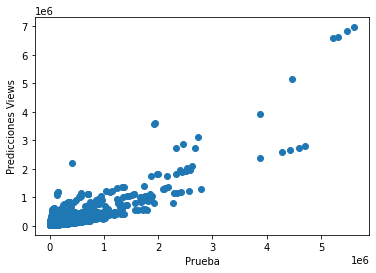

In [22]:
preds = lm.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Prueba')
plt.ylabel('Predicciones Views')
plt.show()

In [23]:
slope = lm.coef_  # w1
intercept = lm.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [5.6497602]
El término independiente de la recta 'w0' es:  27812.39714207773


In [24]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
comment_count,5.64976


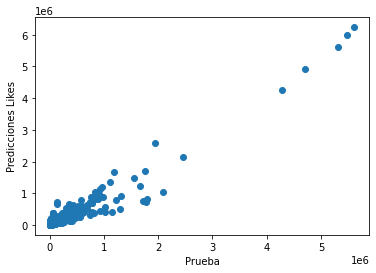

In [25]:
X = df_videos[['views','comment_count']]
y = df_videos['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
preds = lm.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Prueba')
plt.ylabel('Predicciones Likes')
plt.show()

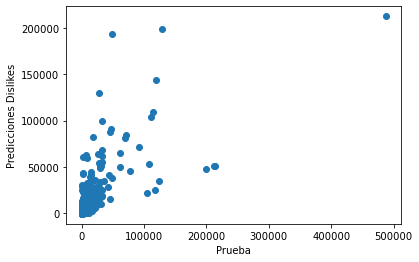

In [26]:
X = df_videos[['views','comment_count']]
y = df_videos['dislikes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
preds = lm.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Prueba')
plt.ylabel('Predicciones Dislikes')
plt.show()

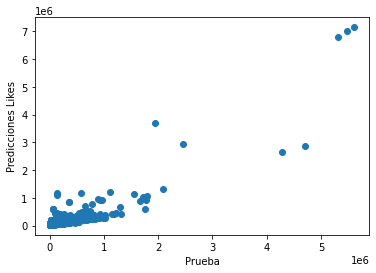

In [27]:
X = df_videos[['comment_count']]
y = df_videos['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
preds = lm.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Prueba')
plt.ylabel('Predicciones Likes')
plt.show()